In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import glob
import numpy as np
import pandas as pd

# For Visuals
import seaborn as sns
import matplotlib.pyplot as plt #for plotting things
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras

# Evaluation Lib.
from sklearn.metrics import classification_report, confusion_matrix

# Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Transfer Learning
from keras.applications.vgg16 import VGG16

# Preparing the Data

In [3]:
import os

dataset_base_dir = "../data"


normal_dir = os.path.join(dataset_base_dir, 'NORMAL')
pneumonia_dir = os.path.join(dataset_base_dir, 'PNEUMONIA')

# # Total counts
total_normal = len(os.listdir(normal_dir))
total_pneumonia = len(os.listdir(pneumonia_dir))

print(total_normal)
print(total_pneumonia)

1584
4273


1584


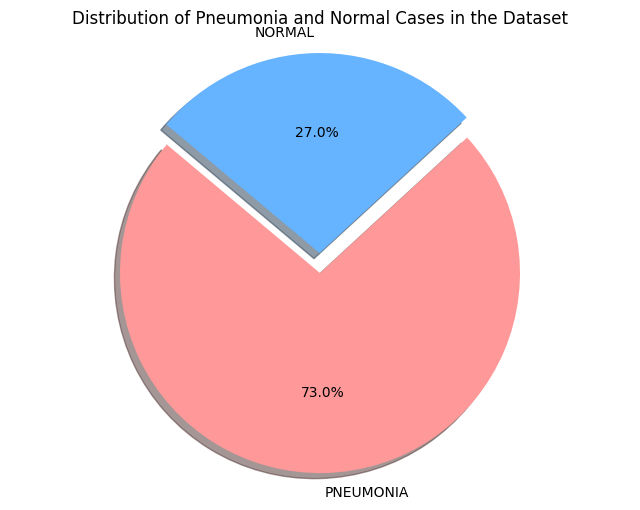

In [41]:
# Prepare data for pie chart
labels = ['PNEUMONIA', 'NORMAL']
sizes = [total_pneumonia, total_normal]
print(total_normal)
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (PNEUMONIA)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Pneumonia and Normal Cases in the Dataset')
plt.show()

In [42]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images_from_directory(directory, label, num_images=9, cols=3):
    # Get list of images
    images = os.listdir(directory)

    # Randomly select images
    selected_images = random.sample(images, min(num_images, len(images)))  # Ensure not to exceed available images

    # Calculate number of rows needed
    rows = (num_images + cols - 1) // cols  # Ceiling division

    # Create figure and axes
    plt.figure(figsize=(20, 5 * rows))

    for i in range(len(selected_images)):
        plt.subplot(rows, cols, i + 1)
        img = plt.imread(os.path.join(directory, selected_images[i]))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"{label} - Image {i + 1}")  # Title with the label

    plt.suptitle(f"Random Images from {label} Dataset", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()

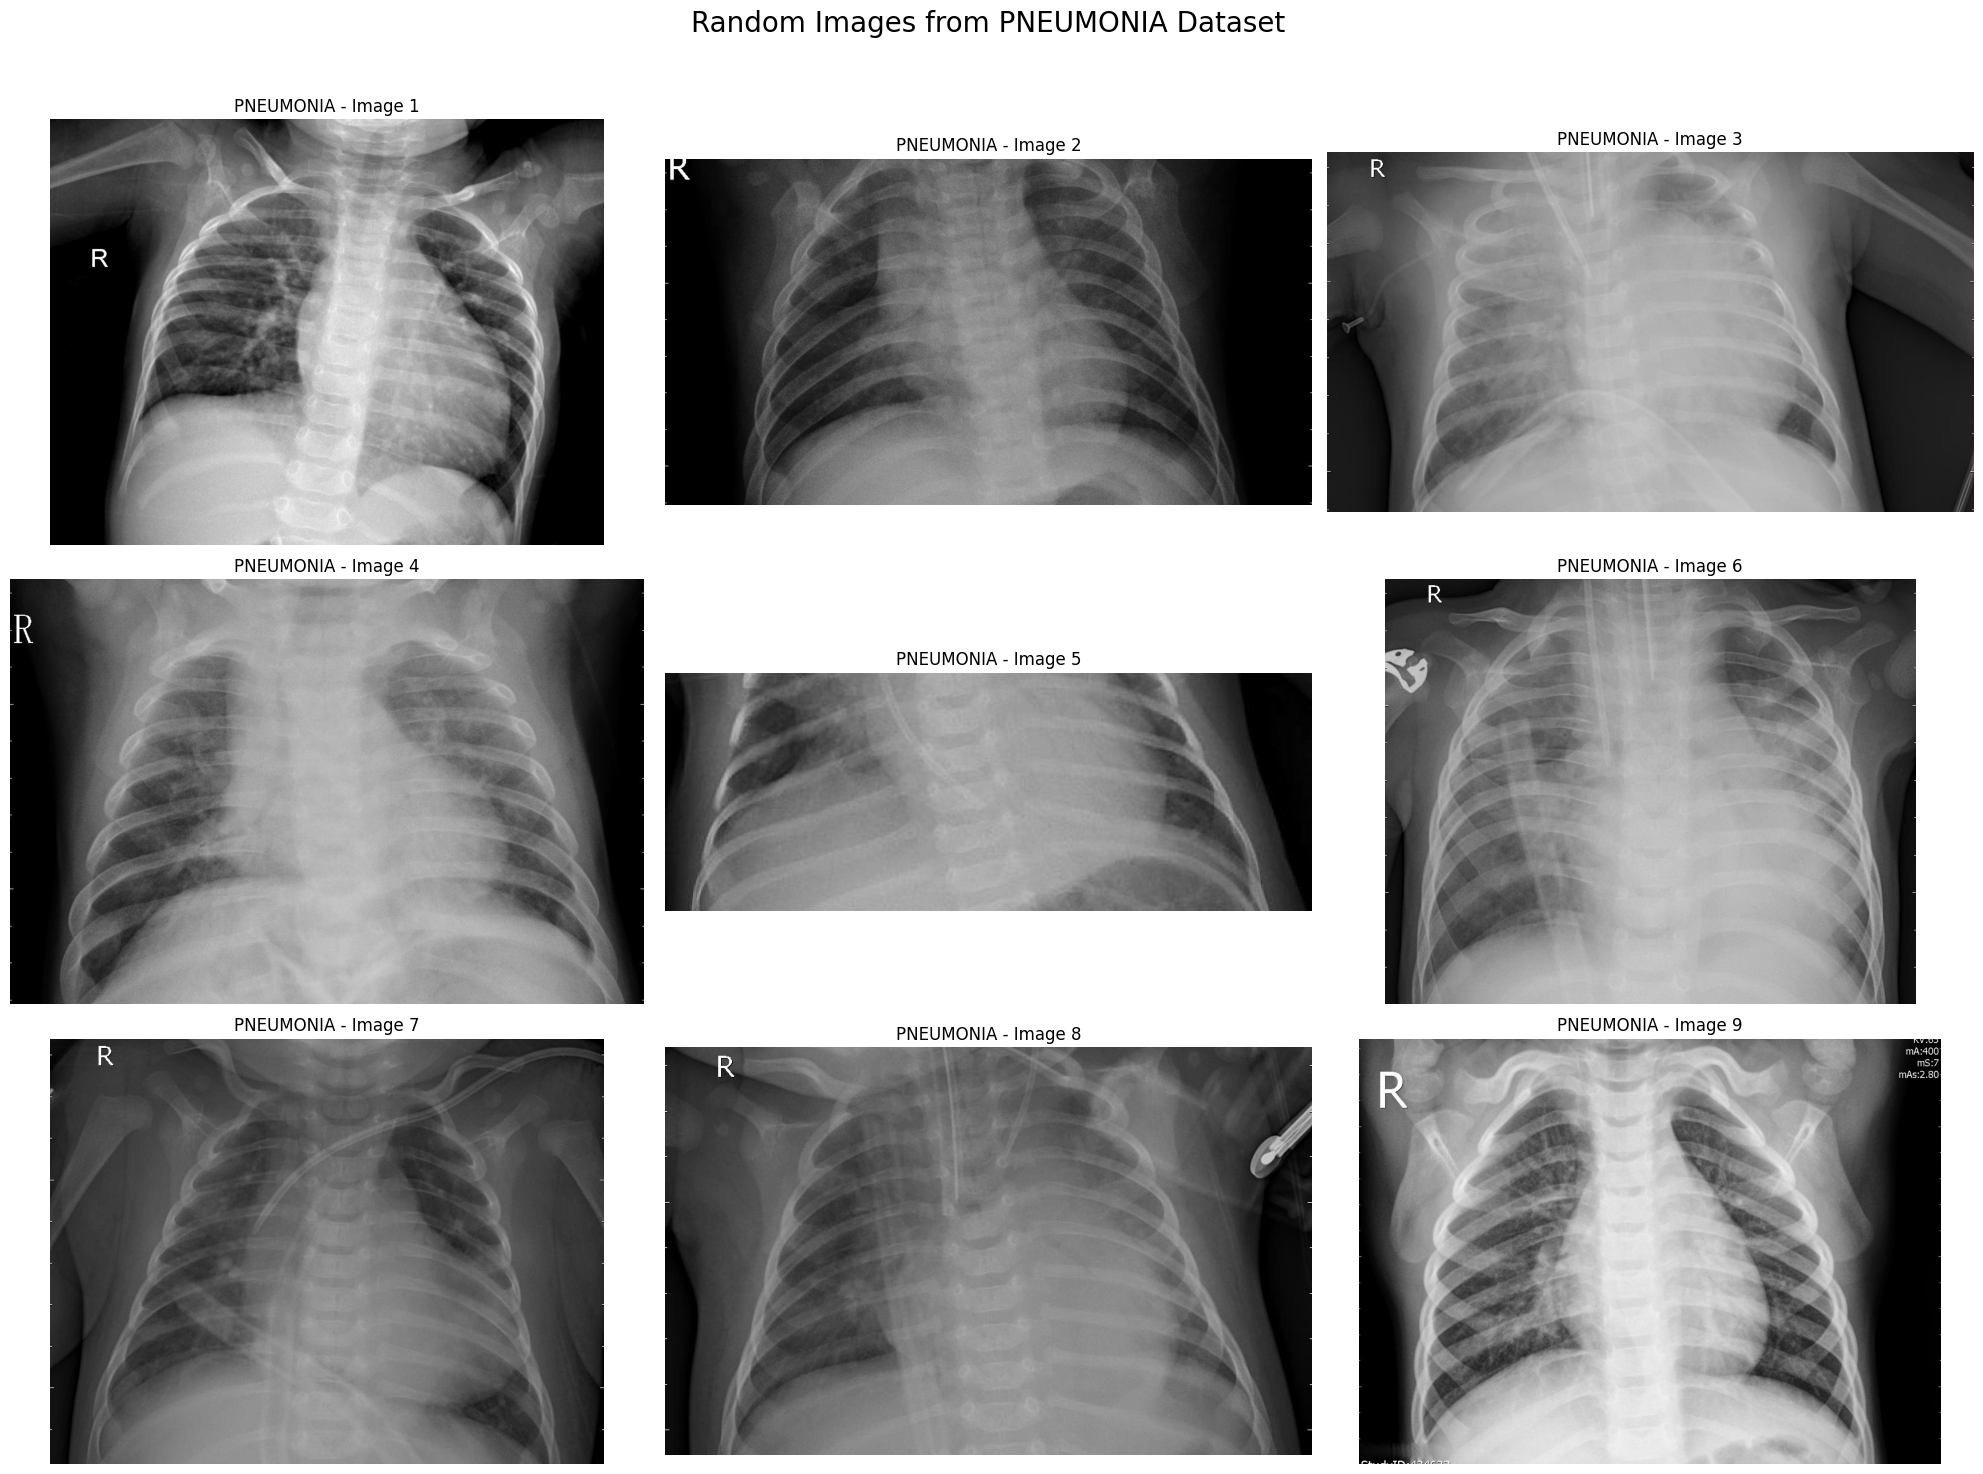

In [43]:
pneumonia_dir = os.path.join(dataset_base_dir, 'PNEUMONIA') # Update the path to use the correct variable
display_random_images_from_directory(pneumonia_dir, label="PNEUMONIA", num_images=9, cols=3)

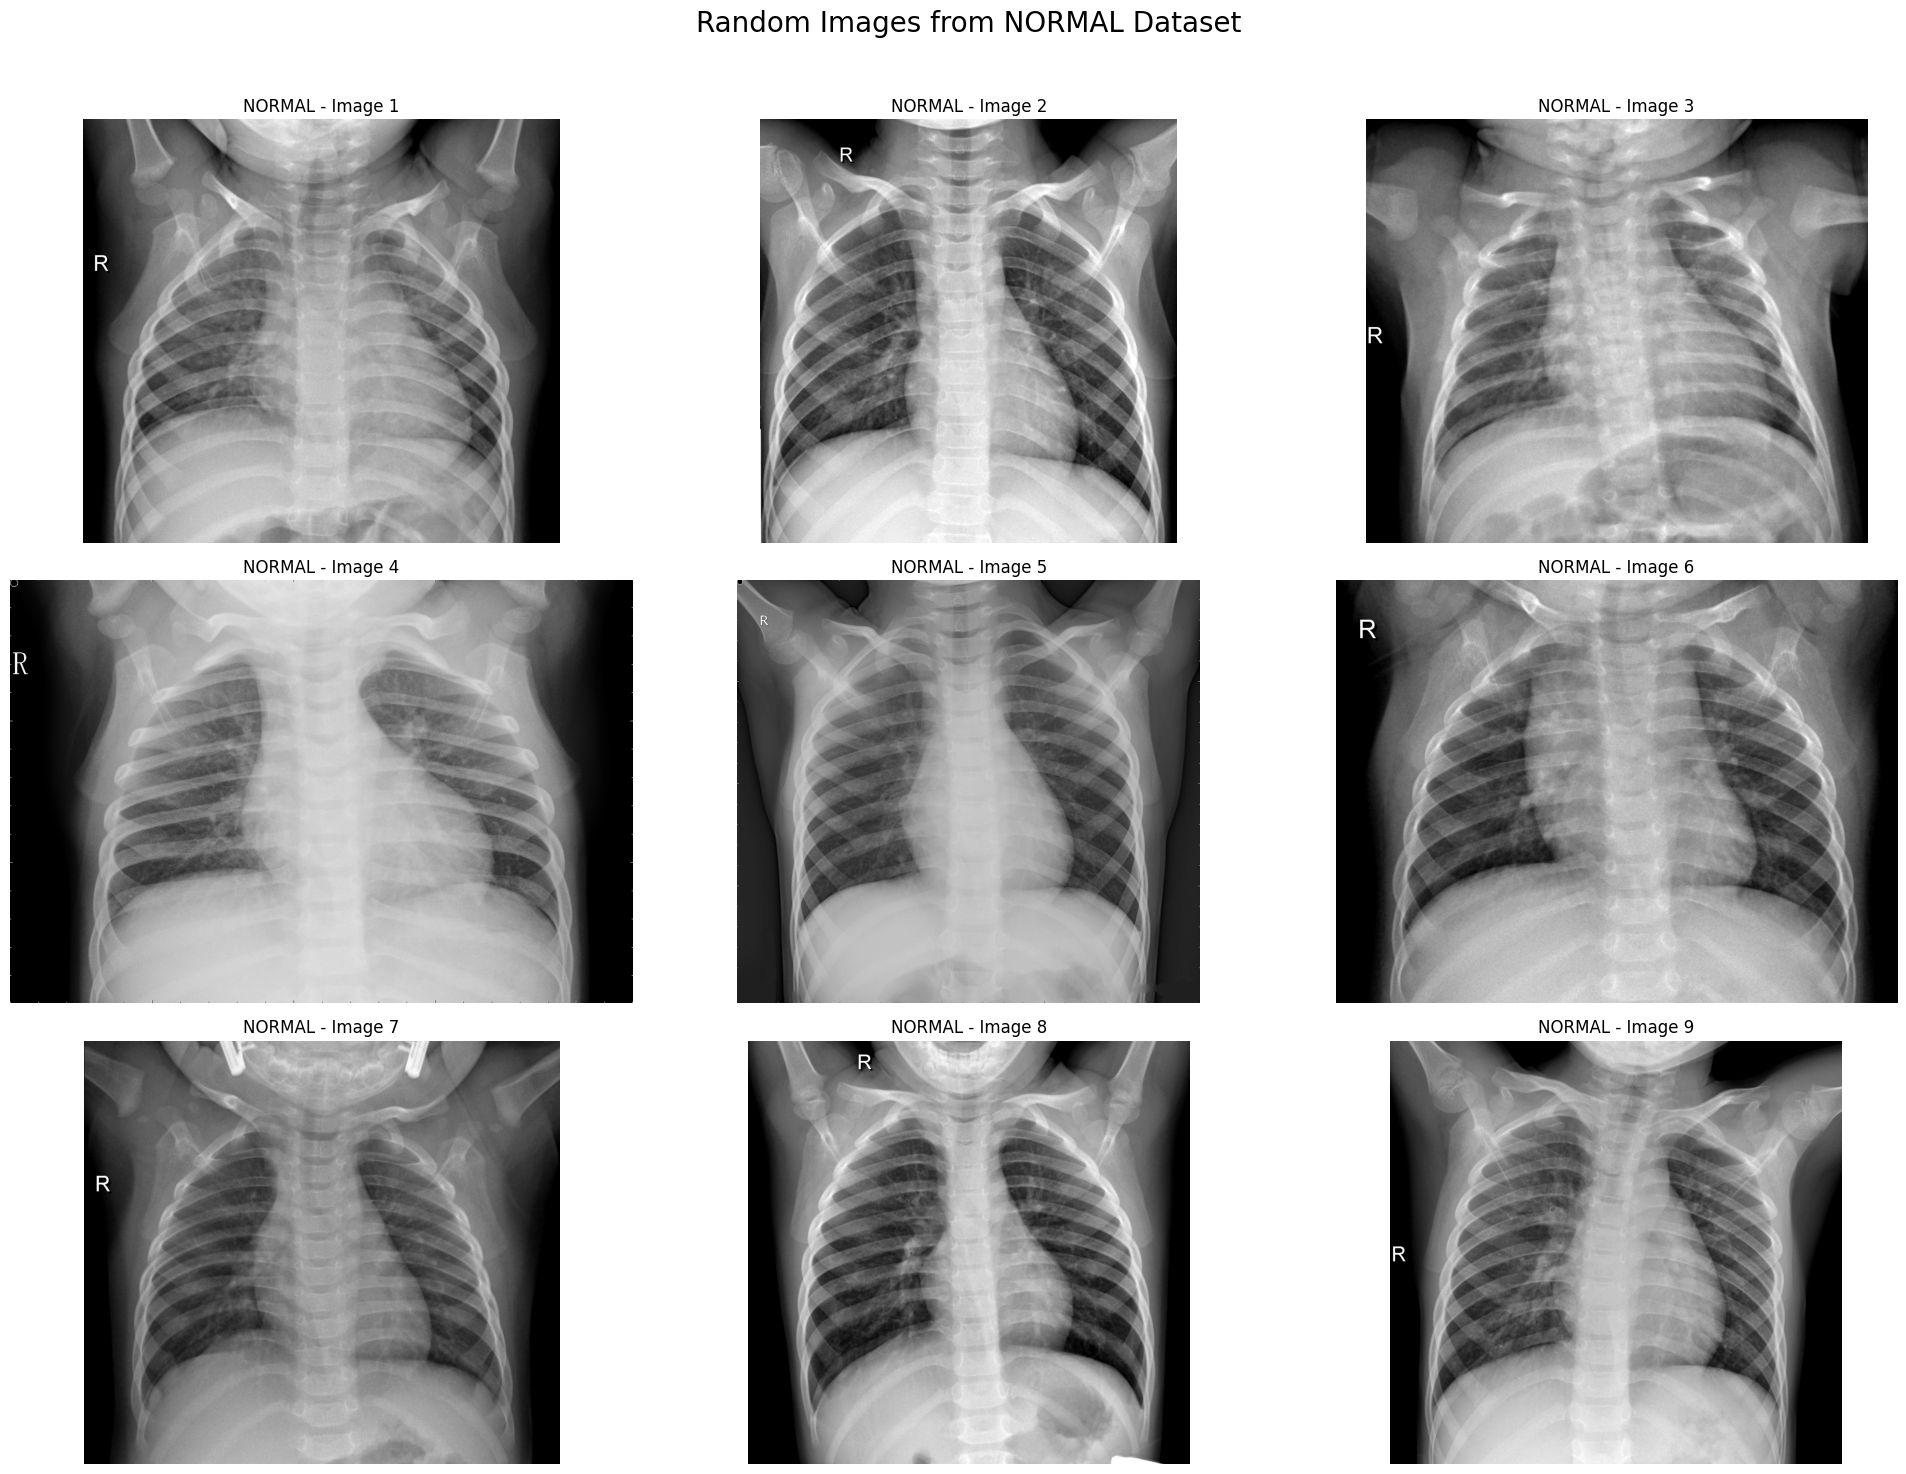

In [44]:
normal_dir = os.path.join(dataset_base_dir, 'NORMAL') # Use the correct variable to construct the path
display_random_images_from_directory(normal_dir, label="NORMAL", num_images=9, cols=3)

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def display_image_and_histogram(image_directory, image_label, color, img_index=0):
    # Load the specified chest X-ray image
    images = [img for img in os.listdir(image_directory)
              if img.lower().endswith(('jpg', 'jpeg', 'png')) and os.path.isfile(os.path.join(image_directory, img))]
    
    if not images:
        print("No images found in the directory.")
        return
    
    selected_image = images[img_index]
    sample_img = plt.imread(os.path.join(image_directory, selected_image))

    # Create a figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Display the chest X-ray image
    axes[0].imshow(sample_img, cmap='gray')
    axes[0].axis('off')  # Hide axis
    axes[0].set_title(f'Raw Chest X-Ray Image - {image_label}')

    # Display image dimensions and statistics
    print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
    print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
    print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

    # Create the histogram of pixel intensities
    sns.histplot(sample_img.ravel(), bins=30, ax=axes[1], kde=False, color=color)
    axes[1].set_title('Distribution of Pixel Intensities in the Image')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('# Pixels in Image')
    axes[1].legend([f"Pixel Mean {sample_img.mean():.4f} & Standard Deviation {sample_img.std():.4f}"], loc='upper right')

    # Adjust layout
    plt.tight_layout()
    plt.show()


The dimensions of the image are 760 pixels width and 1152 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 114.5373 and the standard deviation is 56.2341


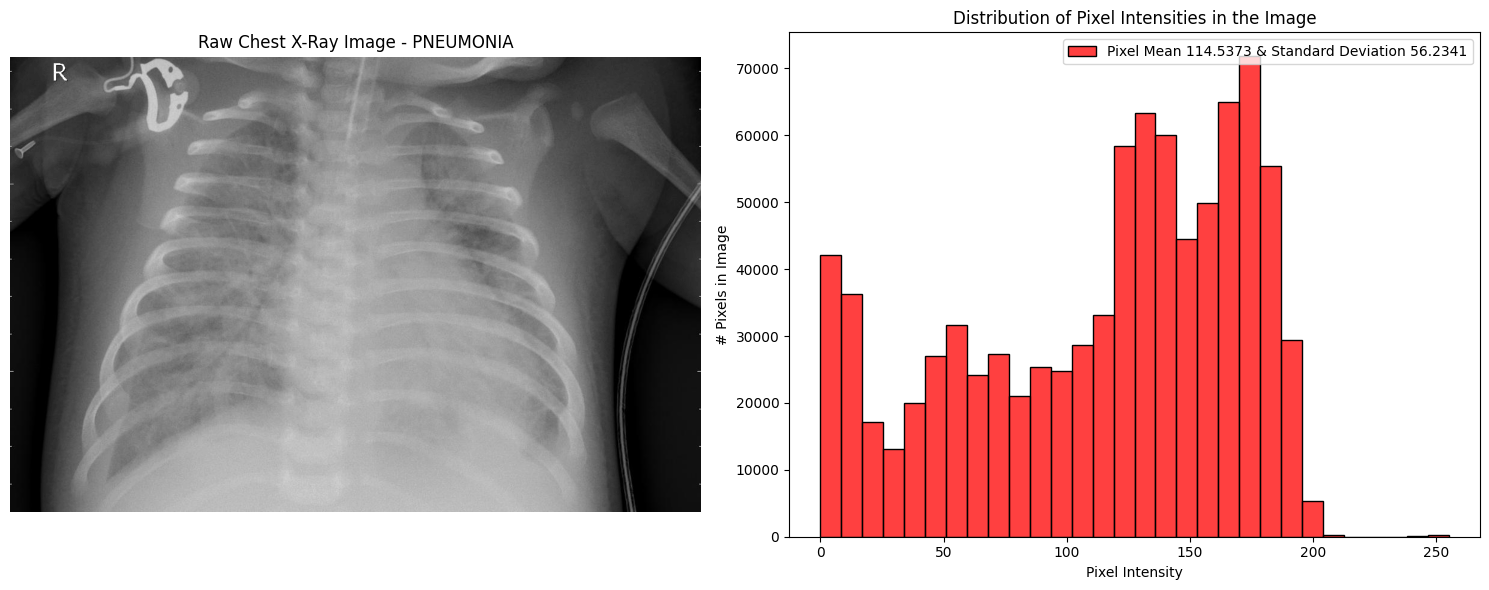

In [46]:
pneumonia_dir = os.path.join(dataset_base_dir, 'PNEUMONIA') # Use the correct path variable
display_image_and_histogram(pneumonia_dir, image_label="PNEUMONIA", img_index=0, color ="red")

The dimensions of the image are 1317 pixels width and 1857 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 130.9986 and the standard deviation is 57.1020


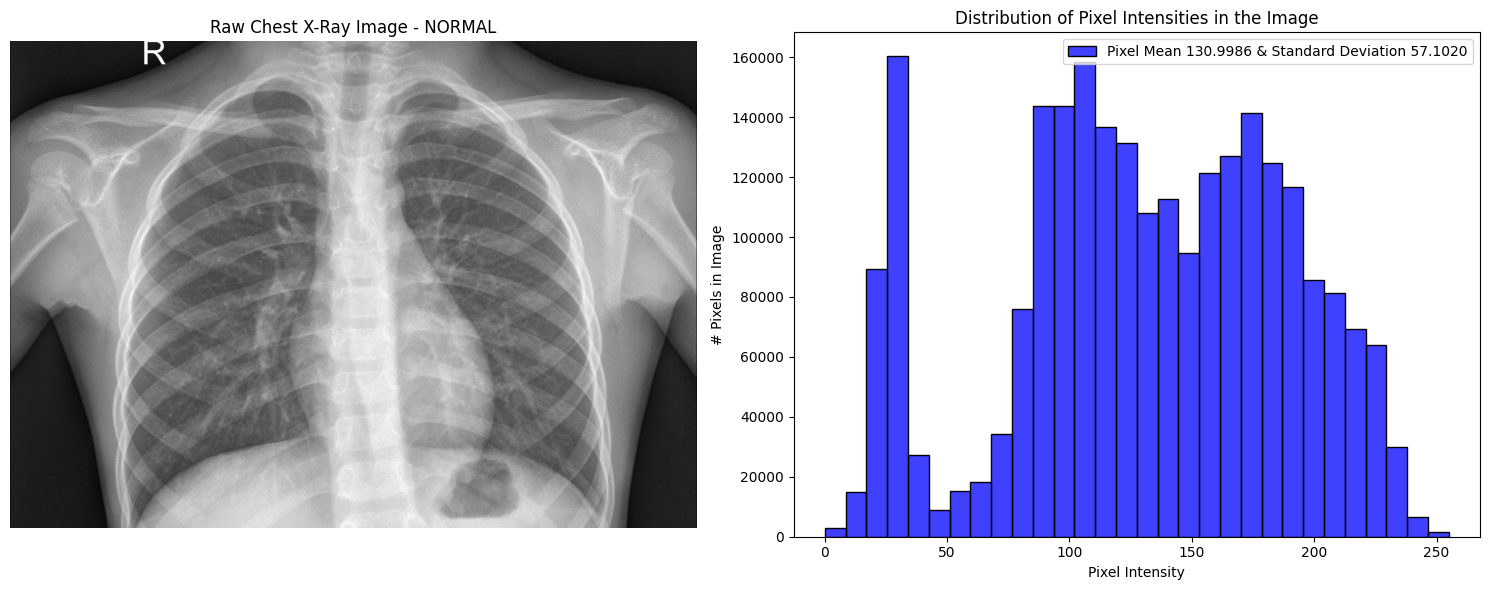

In [47]:
normal_dir = os.path.join(dataset_base_dir, 'NORMAL') # Use paultimothymooney_chest_xray_pneumonia_path instead of a hardcoded path
display_image_and_histogram(normal_dir, image_label="NORMAL", img_index=0,color="blue")

The dimensions of the image are 2016 pixels width and 2032 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 123.8503 and the standard deviation is 50.9675


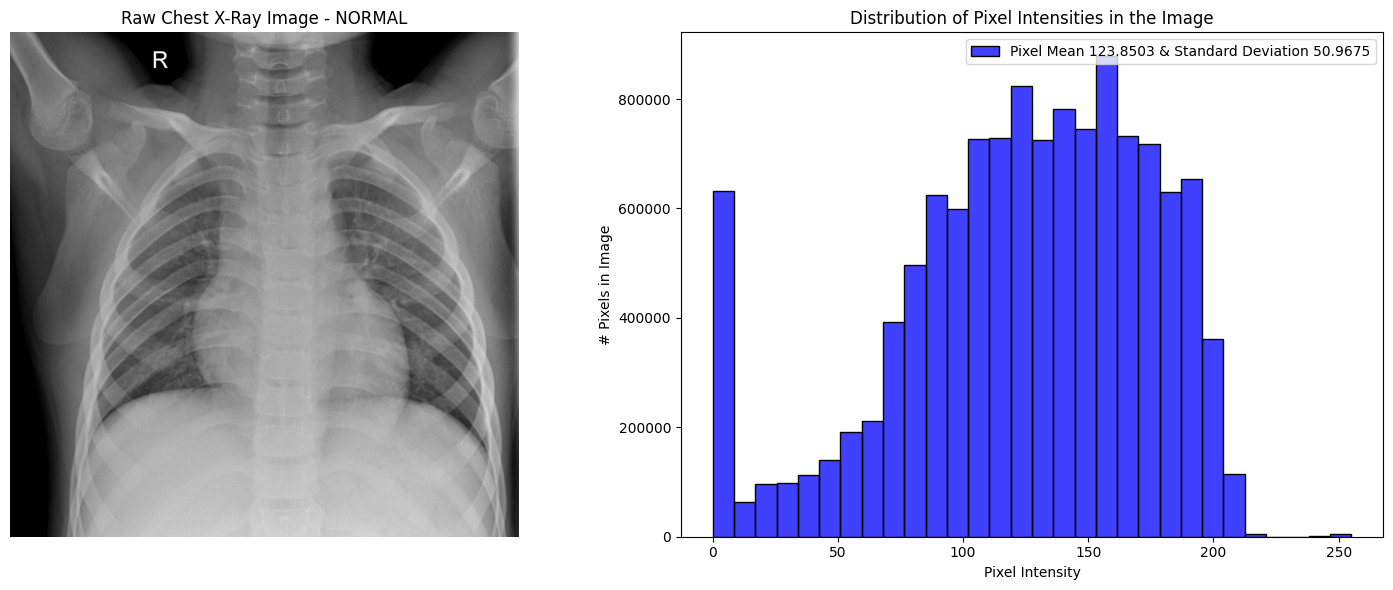

In [5]:
augmented_dir = os.path.join(normal_dir, 'augmented_normal')

# Check and display
if os.path.isdir(augmented_dir):
    # augmented_dir exists, so display from the original NORMAL folder
    display_image_and_histogram(
        image_directory=augmented_dir,
        image_label="NORMAL",
        color="blue",
        img_index=0
    )
else:
    # augmented_dir does not exist, skip
    print(f"Directory '{augmented_dir}' not found. Skipping display.")

In [49]:
batch_size = 64
image_size = (150, 150) #TODO: change this and see what happens.

## Imbalanced Solution

In [50]:
import os
import pandas as pd

# Path to your dataset
DATA_DIR = dataset_base_dir
classes = ['NORMAL', 'Pneumonia']

data = []
for label in classes:
    class_dir = os.path.join(DATA_DIR, label)
    for fname in os.listdir(class_dir):
        if fname.endswith(".jpeg"):
            data.append({
                "path": os.path.join(class_dir, fname),
                "label": label
            })

df = pd.DataFrame(data)


In [ ]:
import os
import random
from PIL import Image, ImageOps, ImageEnhance
import pandas as pd

# Paths
normal_dir = os.path.join(dataset_base_dir, 'NORMAL') 
augmented_dir = os.path.join(normal_dir, 'augmented_normal')
pneumonia_dir = os.path.join(dataset_base_dir, 'PNEUMONIA')

# Ensure augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Get image paths
normal_original = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)
                   if img.lower().endswith(('jpg', 'jpeg', 'png')) and not img.startswith('aug_norm_')]
augmented_existing = [os.path.join(augmented_dir, img) for img in os.listdir(augmented_dir)
                      if img.lower().endswith(('jpg', 'jpeg', 'png'))]
all_normal_images = normal_original + augmented_existing

pneumonia_images = [os.path.join(pneumonia_dir, img) for img in os.listdir(pneumonia_dir)
                    if img.lower().endswith(('jpg', 'jpeg', 'png'))]

# Calculate how many augmented images are needed
needed = len(pneumonia_images) - len(all_normal_images)
print(f"Original NORMAL: {len(normal_original)}, Existing Augmented: {len(augmented_existing)}")
print(f"PNEUMONIA: {len(pneumonia_images)}, Total NORMAL: {len(all_normal_images)}")
print(f"Augmentation needed: {needed}")

# Augmentation function
def augment_image(img_path, i):
    img = Image.open(img_path).convert('RGB')

    if random.random() < 0.5:
        img = ImageOps.mirror(img)

    if random.random() < 0.5:
        angle = random.uniform(-10, 10)
        img = img.rotate(angle)

    if random.random() < 0.5:
        enhancer = ImageEnhance.Brightness(img)
        factor = random.uniform(0.8, 1.2)
        img = enhancer.enhance(factor)

    if random.random() < 0.5:
        enhancer = ImageEnhance.Contrast(img)
        factor = random.uniform(0.8, 1.2)
        img = enhancer.enhance(factor)

    if random.random() < 0.5:
        dx = int(img.width * random.uniform(-0.05, 0.05))
        dy = int(img.height * random.uniform(-0.05, 0.05))
        img = ImageOps.expand(img, border=(dx, dy, -dx, -dy), fill=0)
        img = img.crop((0, 0, img.width, img.height))

    new_filename = f"aug_norm_{i + len(augmented_existing)}.jpeg"
    save_path = os.path.join(augmented_dir, new_filename)
    img.save(save_path)
    return save_path

# Generate augmented images if needed
augmented_paths = []
if needed > 0:
    images_to_augment = random.choices(normal_original, k=needed)
    for i, path in enumerate(images_to_augment):
        augmented_paths.append(augment_image(path, i))

# Rebuild updated normal image list including new augmentations
augmented_existing = [os.path.join(augmented_dir, img) for img in os.listdir(augmented_dir)
                      if img.lower().endswith(('jpg', 'jpeg', 'png'))]
all_normal_images = normal_original + augmented_existing

# ✅ Final dataframe creation
df = pd.DataFrame({
    'path': all_normal_images + pneumonia_images,
    'label': ['NORMAL'] * len(all_normal_images) + ['PNEUMONIA'] * len(pneumonia_images)
})

print(f"✅ Final dataset: {df['label'].value_counts().to_dict()}")


Original NORMAL: 1583, Existing Augmented: 2690
PNEUMONIA: 4273, Total NORMAL: 4273
Augmentation needed: 0
✅ Final dataset: {'NORMAL': 4273, 'PNEUMONIA': 4273}


In [52]:
from sklearn.model_selection import train_test_split

# Train/Val/Test split (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.176, stratify=train_val_df['label'], random_state=42)
# (0.176 of 85% ≈ 15%, so you get ~70/15/15)


In [91]:
import os
import shutil

# Create target directories
output_dir = "test_images"
normal_dir = os.path.join(output_dir, "NORMAL")
pneumonia_dir = os.path.join(output_dir, "PNEUMONIA")

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(pneumonia_dir, exist_ok=True)

# Copy train images only
for index, row in test_df.iterrows():
    image_path = row["path"]
    label = row["label"].upper()  # Ensure it's uppercase like "NORMAL" or "PNEUMONIA"
    image_path = image_path.replace("\\", "/")
    image_filename = os.path.basename(image_path)

    # Set destination based on label
    if label == "NORMAL":
        destination_path = os.path.join(normal_dir, image_filename)
    elif label == "PNEUMONIA":
        destination_path = os.path.join(pneumonia_dir, image_filename)
    else:
        print(f"Unknown label '{label}' for image: {image_path}")
        continue

    # Copy the file
    try:
        shutil.copy(image_path, destination_path)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")

        
# Create target directories
output_dir = "train_images"
normal_dir = os.path.join(output_dir, "NORMAL")
pneumonia_dir = os.path.join(output_dir, "PNEUMONIA")

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(pneumonia_dir, exist_ok=True)

# Copy train images only
for index, row in train_df.iterrows():
    image_path = row["path"]
    label = row["label"].upper()  # Ensure it's uppercase like "NORMAL" or "PNEUMONIA"
    image_path = image_path.replace("\\", "/")
    image_filename = os.path.basename(image_path)

    # Set destination based on label
    if label == "NORMAL":
        destination_path = os.path.join(normal_dir, image_filename)
    elif label == "PNEUMONIA":
        destination_path = os.path.join(pneumonia_dir, image_filename)
    else:
        print(f"Unknown label '{label}' for image: {image_path}")
        continue

    # Copy the file
    try:
        shutil.copy(image_path, destination_path)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")


# Create target directories
output_dir = "validation_images"
normal_dir = os.path.join(output_dir, "NORMAL")
pneumonia_dir = os.path.join(output_dir, "PNEUMONIA")

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(pneumonia_dir, exist_ok=True)

# Copy train images only
for index, row in val_df.iterrows():
    image_path = row["path"]
    label = row["label"].upper()  # Ensure it's uppercase like "NORMAL" or "PNEUMONIA"
    image_path = image_path.replace("\\", "/")
    image_filename = os.path.basename(image_path)

    # Set destination based on label
    if label == "NORMAL":
        destination_path = os.path.join(normal_dir, image_filename)
    elif label == "PNEUMONIA":
        destination_path = os.path.join(pneumonia_dir, image_filename)
    else:
        print(f"Unknown label '{label}' for image: {image_path}")
        continue

    # Copy the file
    try:
        shutil.copy(image_path, destination_path)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")


In [54]:
# Create a new DataFrame with the new paths
new_paths = [os.path.join(output_dir, os.path.basename(path)) for path in test_df["path"]]
new_df = pd.DataFrame({"new_image_path": new_paths, "label": test_df["label"]})

# Save the new DataFrame to a CSV file
new_df.to_csv("test_images_list.csv", index=False)


In [55]:
# Save the image paths to a text file
with open("test_images_list.txt", "w") as f:
    for path in new_paths:
        f.write(f"{path}\n")


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0, # Randomly zoom image
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (180, 180)
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_dataframe requires column names
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_gen = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_gen = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 5985 validated image filenames belonging to 2 classes.
Found 1279 validated image filenames belonging to 2 classes.
Found 1282 validated image filenames belonging to 2 classes.


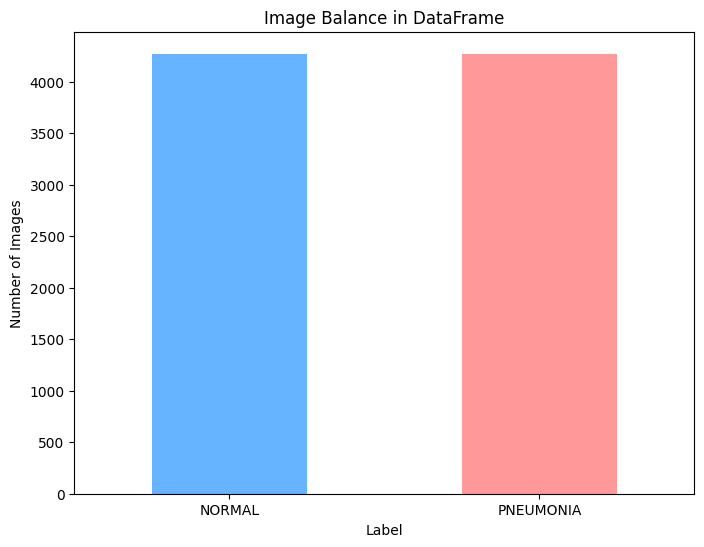

In [58]:
# Count the number of images for each label
label_counts = df['label'].value_counts()

# Plot the balance
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'])
plt.title('Image Balance in DataFrame')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

In [59]:
dict_class = train_gen.class_indices
print('Dictionary:', dict_class)

class_names = list(dict_class.keys())
print('Class labels:', class_names)


Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


In [60]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_df))
print("Number of NORMAL images:", sum(train_df['label'] == 'NORMAL'))
print("Number of PNEUMONIA images:", sum(train_df['label'] == 'PNEUMONIA'))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_df))
print("Number of NORMAL images:", sum(test_df['label'] == 'NORMAL'))
print("Number of PNEUMONIA images:", sum(test_df['label'] == 'PNEUMONIA'))
print()

print("Dataset Characteristics of Val Data Set:")
print("Number of images:", len(val_df))
print("Number of NORMAL images:", sum(val_df['label'] == 'NORMAL'))
print("Number of PNEUMONIA images:", sum(val_df['label'] == 'PNEUMONIA'))
print()


Dataset Characteristics of Train Data Set:
Number of images: 5985
Number of NORMAL images: 2992
Number of PNEUMONIA images: 2993

Dataset Characteristics of Test Data Set:
Number of images: 1282
Number of NORMAL images: 641
Number of PNEUMONIA images: 641

Dataset Characteristics of Val Data Set:
Number of images: 1279
Number of NORMAL images: 640
Number of PNEUMONIA images: 639



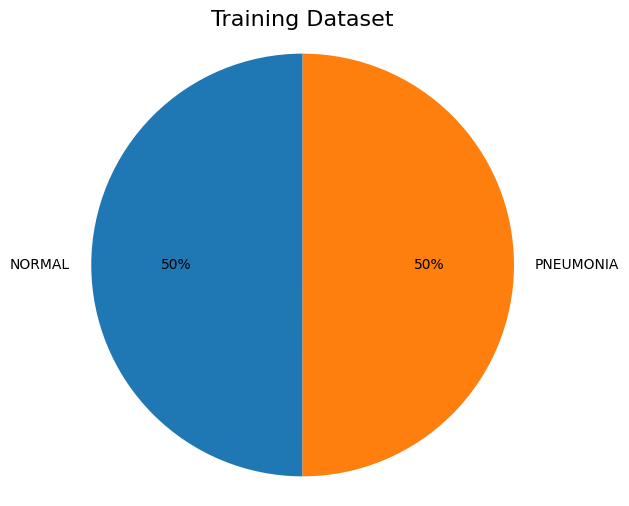

In [61]:
frequency = np.unique(train_gen.classes, return_counts=True)

# Get class labels
class_names = list(train_gen.class_indices.keys())

# Plot
plt.figure(figsize=(6, 6))
plt.title("Training Dataset", fontsize=16)
plt.pie(frequency[1], labels=class_names, autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Modelling (Creating CNN Model and Transfer Learning)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam , Adamax

In [63]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

'''model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
'''
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,604,993 (36.64 MB)

 Trainable params: 9,604,545 (36.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [64]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (180,180,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 180, 180, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 45, 45, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,606,849 (6.13 MB)

 Trainable params: 1,605,761 (6.13 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models


def create_model(input_shape:tuple) -> tf.keras.Model:

    inputs = layers.Input(shape=input_shape)

    # Convolutional layers
    x = layers.Conv2D(32, (3, 3), padding = 'same', activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(64, (3, 3),padding = 'same', activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # x = layers.BatchNormalization()(x)

    x = layers.Conv2D(32, (3, 3), padding = 'same', activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten for dense layers
    x = layers.Flatten()(x)

    # Dense layers
    x = layers.Dense(32, activation="relu")(x)
    # x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    # Model creation and compilation
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy",
                   metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

img_size = (180, 180)
channels = 1
input_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = create_model(input_shape)
model.summary()

Model: "functional_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 180, 180, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 180, 180, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │     8,294,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,294,785 (31.64 MB)

 Trainable params: 8,294,785 (31.64 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models

def conv_block(filters:int,activation:str='relu') -> tf.keras.Sequential:

    block = tf.keras.Sequential([
        layers.SeparableConv2D(filters, 3, activation=activation, padding='same'),
        layers.SeparableConv2D(filters, 3, activation=activation, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPool2D()
    ])

    return block

def dense_block(units:int, dropout_rate:float,activation:str = 'relu') -> tf.keras.Sequential:

    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation=activation),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block


def build_model(input_shape:tuple) -> tf.keras.Model:

    model = models.Sequential([
        layers.Input(shape=input_shape),

        # İlk convolutional blok
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        # Daha fazla convolutional bloklar
        conv_block(32),
        conv_block(64),
        conv_block(128),
        layers.Dropout(0.2),
        conv_block(256),
        layers.Dropout(0.2),

        # Flatten ve dense bloklar
        layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(256, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        # Çıkış katmanı
        layers.Dense(1, activation='sigmoid')
    ])


    # Model derlemesi
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])


    return model

In [67]:
img_size = (150, 150)
channels = 1
input_shape = (img_size[0], img_size[1], channels)

model = build_model(input_shape)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 150, 150, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 150, 150, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 37, 37, 32)     │         2,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (None, 18, 18, 64)     │         7,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (None, 9, 9, 128)      │        27,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_20 (Sequential)      │ (None, 4, 4, 256)      │       103,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_21 (Sequential)      │ (None, 512)            │     2,099,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_22 (Sequential)      │ (None, 256)            │       132,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_23 (Sequential)      │ (None, 128)            │        33,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_24 (Sequential)      │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,416,449 (9.22 MB)

 Trainable params: 2,413,569 (9.21 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [68]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, LayerNormalization, ReLU, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import CosineDecay

# Cosine Decay ile Learning Rate Annealing (Başlangıç öğrenme hızı: 0.001)
initial_learning_rate = 0.001
lr_schedule = CosineDecay(initial_learning_rate, decay_steps=10000)
optimizer = tf.keras.optimizers.Adamax(learning_rate=lr_schedule)

model = Sequential()

# İlk Conv2D katmanı
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

# İkinci Conv2D katmanı
model.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2, 2)))

# Üçüncü Conv2D katmanı
model.add(Conv2D(filters=128, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten yerine GlobalAveragePooling2D kullanıldı
model.add(Flatten())

# Layer Normalization eklendi (isteğe bağlı)
#model.add(LayerNormalization())

# Dense katmanlar
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.3))

model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.2))

model.add(Dense(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.2))

# Çıkış katmanı
model.add(Dense(1, activation='sigmoid'))

# Modelin derlenmesi
model.compile(optimizer=optimizer,  # Cosine Decay ile Adamax optimizer
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

# Model özetini göster
model.summary()


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 178, 178, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 87, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_17 (ReLU)                 │ (None, 41, 41, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 64)             │             

 Total params: 13,246,209 (50.53 MB)

 Trainable params: 13,244,801 (50.52 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [69]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ReLU, LeakyReLU
from tensorflow.keras.regularizers import l2

model = Sequential()

# İlk Conv2D katmanı
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

# İkinci Conv2D katmanı
model.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2, 2)))

# Üçüncü Conv2D katmanı
model.add(Conv2D(filters=128, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten yerine GlobalAveragePooling2D kullanıldı
model.add(Flatten())

# Layer Normalization eklendi (isteğe bağlı)
#model.add(LayerNormalization())

model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())

# Dense katmanlar
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.3))

model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.2))

model.add(Dense(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(ReLU())
# model.add(Dropout(0.2))

# Çıkış katmanı
model.add(Dense(1, activation='sigmoid'))

# Modelin derlenmesi
model.compile(optimizer=Adamax(learning_rate=0.001),  # Cosine Decay ile Adamax optimizer
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

# Model özetini göster
model.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 178, 178, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_22 (ReLU)                 │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_23 (ReLU)                 │ (None, 87, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_24 (ReLU)                 │ (None, 41, 41, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_25 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_26 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_27 (ReLU)                 │ (None, 128)            │             

 Total params: 26,487,041 (101.04 MB)

 Trainable params: 26,484,609 (101.03 MB)

 Non-trainable params: 2,432 (9.50 KB)

## Transfer Learning

In [70]:
# Gerekli import işlemleri
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax

# Load the Xception base model without the top (classification) layer
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build Model
model = Sequential()

# Base Model
model.add(base_model)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.45))

# Dense Layer 1
model.add(Dense(220, activation='relu'))

# Dropout Layer
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(60,activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 220)            │       450,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,333,773 (81.38 MB)

 Trainable params: 468,197 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

## Callbacks

In [71]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard

# Learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    factor=0.3,
    mode='min',
    min_delta=0.001,
    cooldown=2,
    min_lr=1e-6
)

# Model checkpointing
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Filepath to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine whether to save
    verbose=1
)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# TensorBoard
tensorboard = TensorBoard(
    log_dir='./logs',  # Directory for TensorBoard logs
    histogram_freq=1,  # Frequency (in epochs) at which to compute activation and weight histograms
    write_graph=True,  # Whether to visualize the graph
    write_images=True  # Whether to write model weights as image
)


# Combine all callbacks into a list
callbacks = [
    learning_rate_reduction,
    model_checkpoint,
    early_stopping,
    tensorboard
]

In [72]:
# Gerekli import işlemleri
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax

# Load the Xception base model without the top (classification) layer
# Change the input_shape to (180, 180, 3) to match the training data
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(180, 180, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build Model
model = Sequential()

# Base Model
model.add(base_model)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.45))

# Dense Layer 1
model.add(Dense(220, activation='relu'))

# Dropout Layer
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(60,activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 220)            │       450,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,333,773 (81.38 MB)

 Trainable params: 468,197 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

In [73]:
model.save("last_model_CONV.keras")

# Visualizing Predictions on the Validation Set (Validation Part)

In [74]:
loss, accuracy, precision, recall = model.evaluate(val_gen)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 720ms/step - accuracy: 0.3603 - loss: 0.7492 - precision_13: 0.3290 - recall_13: 0.3153
Loss: 0.7463
Accuracy: 0.3620
Precision: 0.3455
Recall: 0.3099


In [75]:
# Then during model.fit
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8716 - loss: 0.3057 - precision_13: 0.8771 - recall_13: 0.8649
Epoch 1: val_accuracy improved from -inf to 0.92963, saving model to best_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 189s 983ms/step - accuracy: 0.8717 - loss: 0.3054 - precision_13: 0.8772 - recall_13: 0.8651 - val_accuracy: 0.9296 - val_loss: 0.2011 - val_precision_13: 0.9741 - val_recall_13: 0.8826 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.9290 - loss: 0.1766 - precision_13: 0.9332 - recall_13: 0.9223
Epoch 2: val_accuracy improved from 0.92963 to 0.93745, saving model to best_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 186s 987ms/step - accuracy: 0.9290 - loss: 0.1766 - precision_13: 0.9332 - recall_13: 0.9223 - val_accuracy: 0.9375 - val_loss: 0.1542 - val_precision_13: 0.9666 - val_recall_13: 0.9061 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.9344 - loss: 0.16

In [76]:
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install deap pygad


In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pygad
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

def load_data():
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_data = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )

    val_data = val_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )

    return train_data, val_data

train_data, val_data = load_data()

# دالة بناء النموذج مع المعاملات الوراثية
def build_model(solution):
    learning_rate = solution[0]
    dropout_rate = solution[1]

    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# دالة اللياقة (Fitness Function)
def fitness_function(ga_instance, solution, solution_idx):
    model = build_model(solution)
    history = model.fit(train_data, validation_data=val_data, epochs=3, batch_size=32, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    return val_acc

# إعداد خوارزمية GA
num_generations = 5
num_parents_mating = 3

ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=5,
    num_genes=2,
    init_range_low=0.0001, init_range_high=0.01,  # مجال معدل التعلم
    gene_space=[{'low': 0.0001, 'high': 0.01}, {'low': 0.2, 'high': 0.5}],  # معدل التعلم + Dropout Rate
)

# تشغيل الخوارزمية الجينية
ga_instance.run()

# استخراج أفضل معلمات
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"أفضل المعلمات المكتشفة: Learning Rate = {solution[0]}, Dropout Rate = {solution[1]}")

# بناء النموذج النهائي وتدريبه باستخدام أفضل المعلمات
final_model = build_model(solution)
final_model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# حفظ النموذج النهائي
final_model.save("/best_vgg16_modelGA.keras")
print("تم حفظ النموذج النهائي بنجاح!")


Found 5985 validated image filenames belonging to 2 classes.
Found 1279 validated image filenames belonging to 2 classes.
أفضل المعلمات المكتشفة: Learning Rate = 0.007553675779093278, Dropout Rate = 0.39270757485919605
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8240 - loss: 0.9111 - val_accuracy: 0.9664 - val_loss: 0.0947
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9428 - loss: 0.1515 - val_accuracy: 0.9601 - val_loss: 0.1089
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9244 - loss: 0.1616 - val_accuracy: 0.9664 - val_loss: 0.1029
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9458 - loss: 0.1483 - val_accuracy: 0.9664 - val_loss: 0.1043
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9514 - loss: 0.1289 - val_accuracy: 0.9531 - val_loss: 0.1100
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 1000ms/step - accuracy: 0.9411 - loss: 0.1256 - val_accuracy: 0.9687 - val_loss: 0.0858
Epo

In [78]:
final_model.save("best_vgg16_modelGA.keras")

In [79]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from deap import base, creator, tools, algorithms

# 1. Load and prepare dataset
def load_data():
    datagen = ImageDataGenerator(rescale=1./255)

    train_data = datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )

    val_data = datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )

    return train_data, val_data

train_data, val_data = load_data()

# 2. Build model from genes
def build_model(learning_rate, dropout_rate):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. DEAP Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # We want to maximize accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Genes: [learning_rate, dropout_rate]
toolbox.register("learning_rate", random.uniform, 0.0001, 0.01)
toolbox.register("dropout_rate", random.uniform, 0.2, 0.5)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.learning_rate, toolbox.dropout_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function
def evaluate(individual):
    lr, dr = individual
    model = build_model(lr, dr)
    history = model.fit(train_data, validation_data=val_data, epochs=2, verbose=0)
    acc = history.history['val_accuracy'][-1]
    return acc,

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.05, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 4. Run Evolution
population = toolbox.population(n=5)
NGEN = 3
for gen in range(NGEN):
    print(f"Generation {gen + 1}")
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# 5. Get the best solution
top_ind = tools.selBest(population, k=1)[0]
best_lr, best_dr = top_ind
print(f"Best hyperparams: Learning rate = {best_lr}, Dropout = {best_dr}")

# 6. Final model training
final_model = build_model(best_lr, best_dr)
final_model.fit(train_data, validation_data=val_data, epochs=10)
final_model.save("best_vgg16_model_deap.keras")
print("Model saved!")


Found 5985 validated image filenames belonging to 2 classes.
Found 1279 validated image filenames belonging to 2 classes.
Generation 1
Generation 2
Generation 3
Best hyperparams: Learning rate = 0.001737684235659055, Dropout = 0.25118734040785085
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 185s 977ms/step - accuracy: 0.8549 - loss: 0.3365 - val_accuracy: 0.9640 - val_loss: 0.0996
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9560 - loss: 0.1167 - val_accuracy: 0.9672 - val_loss: 0.0859
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9624 - loss: 0.1027 - val_accuracy: 0.9703 - val_loss: 0.0822
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 186s 987ms/step - accuracy: 0.9617 - loss: 0.0979 - val_accuracy: 0.9679 - val_loss: 0.0906
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 178s 949ms/step - accuracy: 0.9686 - loss: 0.0950 - val_accuracy: 0.9695 - val_loss: 0.0780
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 179s 950ms/step - accuracy: 0.9699 - loss: 0.0796 - val_acc

In [80]:
y_pred = model.predict(val_gen)

# Convert probabilities to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

Class_labels = ['NORMAL', 'PNEUMONIA']

40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 654ms/step


In [81]:
# İlk 15 tahminin sınıf etiketleriyle birlikte gösterilmesi
for i in range(15):  # İlk 15 tahmini göstermek için döngü
    predicted_class = Class_labels[y_pred_binary[i][0]]  # 1'e 'PNEUMONIA', 0'a 'NORMAL' etiketini ver
    print(f"Prediction: {y_pred[i][0]:.2f}, Class: {predicted_class}")


Prediction: 0.00, Class: NORMAL
Prediction: 0.06, Class: NORMAL
Prediction: 0.95, Class: PNEUMONIA
Prediction: 0.56, Class: PNEUMONIA
Prediction: 1.00, Class: PNEUMONIA
Prediction: 0.00, Class: NORMAL
Prediction: 1.00, Class: PNEUMONIA
Prediction: 0.56, Class: PNEUMONIA
Prediction: 0.01, Class: NORMAL
Prediction: 1.00, Class: PNEUMONIA
Prediction: 0.00, Class: NORMAL
Prediction: 0.00, Class: NORMAL
Prediction: 0.99, Class: PNEUMONIA
Prediction: 0.38, Class: NORMAL
Prediction: 0.00, Class: NORMAL


In [82]:
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

y_true = val_gen.classes

print(classification_report(y_true, y_pred_binary, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


# Now you can use the classification_report function:
print(classification_report(val_gen.classes, y_pred_binary, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.98      0.95       640
   Normal (Class 1)       0.98      0.93      0.95       639

           accuracy                           0.95      1279
          macro avg       0.95      0.95      0.95      1279
       weighted avg       0.95      0.95      0.95      1279

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.98      0.95       640
   Normal (Class 1)       0.98      0.93      0.95       639

           accuracy                           0.95      1279
          macro avg       0.95      0.95      0.95      1279
       weighted avg       0.95      0.95      0.95      1279



In [83]:
print(f"Length of test_set.classes: {len(val_gen.class_indices)}")
print(f"Length of y_pred_binary: {len(y_pred_binary)}")

Length of test_set.classes: 2
Length of y_pred_binary: 1279


40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 623ms/step


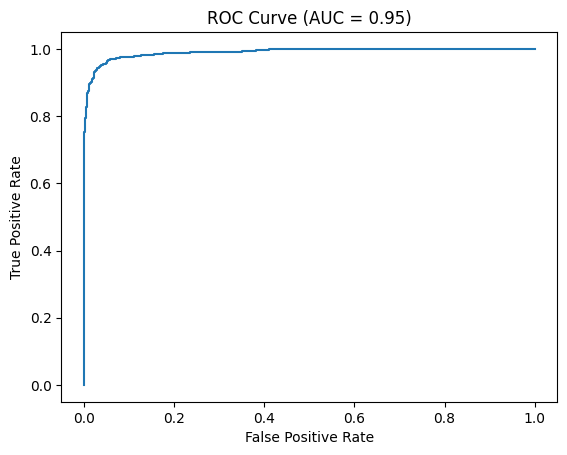

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# Make predictions
y_pred = model.predict(val_gen)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the FPR, TPR, and thresholds for various classification thresholds
fpr, tpr, thresholds = roc_curve(val_gen.classes, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(val_gen.classes, y_pred_binary)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score:.2f})')
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step


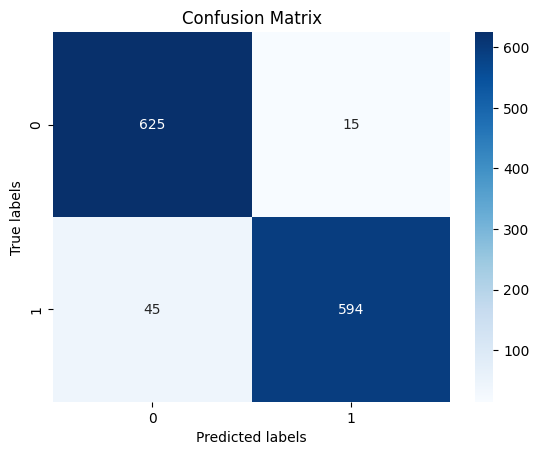

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(val_gen)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
confusion_Matrix = confusion_matrix(val_gen.classes, y_pred_binary)

# Plot confusion matrix
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


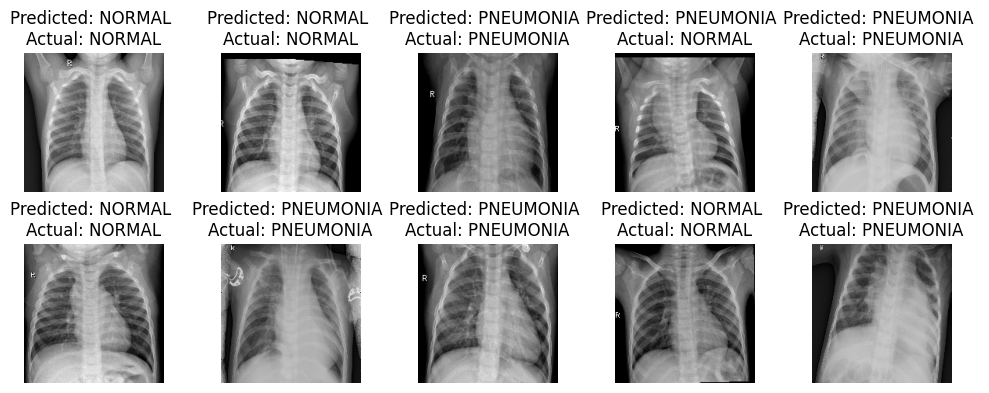

In [86]:
x_test,y_test = next(val_gen)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()

for i in range(10):
    predicted = model.predict(np.array([x_test[i]]))
    predictedClass = int(predicted[0][0] >= 0.5)
    actual = int(y_test[i])

    axs[i].imshow(x_test[i], cmap='gray')
    axs[i].set_title(f'Predicted: {Class_labels[predictedClass]} \nActual: {Class_labels[actual]}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

📤 اختر صورة لفحصها...
✅ تم حفظ الصورة: NORMAL2-IM-0852-0001.jpeg في test_images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


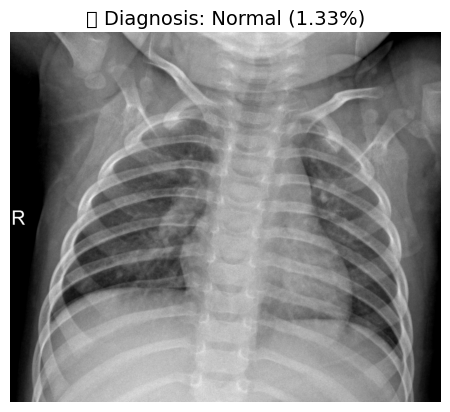

In [88]:
# 📦 استيراد المكتبات الأساسية
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tkinter import Tk, filedialog

# ✅ تحميل النموذج المدرب
model = load_model("best_vgg16_model_deap.keras")

# 📁 إنشاء مجلد لحفظ الصور إذا لم يكن موجودًا
image_folder = "test_images"
os.makedirs(image_folder, exist_ok=True)

# ⬆️ اختيار صورة من الجهاز المحلي باستخدام نافذة
print("📤 اختر صورة لفحصها...")
Tk().withdraw()  # إخفاء نافذة Tkinter
file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])

if not file_path:
    print("❌ لم يتم اختيار صورة.")
else:
    # 💾 نسخ الصورة إلى مجلد test_images
    import shutil
    filename = os.path.basename(file_path)
    saved_path = os.path.join(image_folder, filename)
    print(f"✅ تم حفظ الصورة: {filename} في {image_folder}")

    # 🧼 معالجة الصورة
    try:
        img_size = (150, 150)
        image = load_img(saved_path, target_size=img_size)
        image_array = img_to_array(image) / 255.0
        image_array = np.expand_dims(image_array, axis=0)

        # 🔍 التنبؤ باستخدام النموذج
        prediction = model.predict(image_array)
        confidence = float(prediction[0][0]) * 100
        label = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"

        # 🖼️ عرض الصورة والنتيجة
        img_display = cv2.imread(saved_path)
        img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)

        plt.imshow(img_display)
        plt.axis("off")
        plt.title(f"🔍 Diagnosis: {label} ({confidence:.2f}%)", fontsize=14)
        plt.show()

    except Exception as e:
        print(f"⚠️ حدث خطأ أثناء معالجة الصورة: {e}")


# ACO

In [2]:
# 📦 استيراد المكتبات الأساسية
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd


# ✅ إعداد محركات الصور
def load_data():
    datagen = ImageDataGenerator(rescale=1./255)

    train_data = datagen.flow_from_directory(
        'D:/2_University/Projects/Sandy/ComputerVision/OPT/train_images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training',
        shuffle=True
    )

    val_data = datagen.flow_from_directory(
        'D:/2_University/Projects/Sandy/ComputerVision/OPT/validation_images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle=False
    )

    return train_data, val_data

train_data, val_data = load_data()

# ✅ بناء نموذج VGG16
def build_model(lr, dropout):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ تعريف دالة الهدف للتقييم
def fitness(params):
    lr, dropout = params
    try:
        model = build_model(lr, dropout)
        history = model.fit(train_data, validation_data=val_data, epochs=3, batch_size=32, verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        print(f"lr: {lr:.5f}, dropout: {dropout:.2f}, acc: {val_acc:.4f}")
        return -val_acc  # minimize
    except Exception as e:
        print("⚠️ Error:", e)
        return 1.0

# ✅ ACO class
class AntColonyOptimizer:
    def __init__(self, fitness_func, param_ranges, num_ants=5, num_iterations=10, evaporation_rate=0.5):
        self.fitness_func = fitness_func
        self.param_ranges = param_ranges
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.evaporation_rate = evaporation_rate
        self.pheromone = [1.0 for _ in param_ranges]

    def _sample_params(self):
        return [random.uniform(low, high) for (low, high) in self.param_ranges]

    def optimize(self):
        best_score = float("inf")
        best_params = None

        for iteration in range(self.num_iterations):
            all_solutions = []
            for ant in range(self.num_ants):
                params = self._sample_params()
                score = self.fitness_func(params)
                all_solutions.append((params, score))

            all_solutions.sort(key=lambda x: x[1])
            best_solution = all_solutions[0]

            # تحديث الفيرومونات
            for i in range(len(self.pheromone)):
                self.pheromone[i] *= (1 - self.evaporation_rate)
                self.pheromone[i] += 1.0 / (1.0 + best_solution[1])

            if best_solution[1] < best_score:
                best_score = best_solution[1]
                best_params = best_solution[0]

            print(f"📈 Iteration {iteration+1}: Best fitness = {-best_score:.4f}")

        return best_params, best_score

# ✅ تحديد مجال المعلمات
param_ranges = [(1e-4, 1e-2), (0.2, 0.5)]  # learning rate, dropout
aco = AntColonyOptimizer(fitness_func=fitness, param_ranges=param_ranges, num_ants=5, num_iterations=7)

# ✅ تنفيذ البحث
best_params, best_score = aco.optimize()
best_lr, best_dropout = best_params
print(f"\n🏁 Best parameters using ACO: Learning Rate = {best_lr:.6f}, Dropout = {best_dropout:.2f}")

# ✅ التدريب النهائي
final_model = build_model(best_lr, best_dropout)
final_model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# ✅ الحفظ
final_model.save("best_vgg16_aco_model.keras")
print("✅ Model saved as best_vgg16_aco_model.keras")


Found 5985 images belonging to 2 classes.
Found 1279 images belonging to 2 classes.
lr: 0.00192, dropout: 0.30, acc: 0.9656
lr: 0.00916, dropout: 0.39, acc: 0.9554
lr: 0.00898, dropout: 0.37, acc: 0.9492
lr: 0.00420, dropout: 0.35, acc: 0.9664
lr: 0.00332, dropout: 0.36, acc: 0.9711
📈 Iteration 1: Best fitness = 0.9711
lr: 0.00487, dropout: 0.29, acc: 0.9719
lr: 0.00755, dropout: 0.50, acc: 0.9461
lr: 0.00600, dropout: 0.44, acc: 0.9648
lr: 0.00399, dropout: 0.43, acc: 0.9281
lr: 0.00438, dropout: 0.43, acc: 0.9500
📈 Iteration 2: Best fitness = 0.9719
lr: 0.00322, dropout: 0.48, acc: 0.9656
lr: 0.00622, dropout: 0.34, acc: 0.9656
lr: 0.00688, dropout: 0.31, acc: 0.9703
lr: 0.00768, dropout: 0.37, acc: 0.9382
lr: 0.00232, dropout: 0.48, acc: 0.9687
📈 Iteration 3: Best fitness = 0.9719
lr: 0.00701, dropout: 0.24, acc: 0.9719
lr: 0.00820, dropout: 0.26, acc: 0.9719
lr: 0.00749, dropout: 0.42, acc: 0.9507
lr: 0.00760, dropout: 0.37, acc: 0.9633
lr: 0.00413, dropout: 0.44, acc: 0.9672
📈 Ite

# BAYES

In [ ]:
import sys
!{sys.executable} -m pip install scikit-optimize


  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata (9.7 kB)
Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from skopt import gp_minimize
from skopt.space import Real

# بناء نموذج VGG16
def build_model(lr, dropout):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# دالة الهدف لـ Bayesian Optimization
def fitness(params):
    lr, dropout = params
    try:
        model = build_model(lr, dropout)
        history = model.fit(train_data, validation_data=val_data, epochs=3, batch_size=32, verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        print(f"lr: {lr:.5f}, dropout: {dropout:.2f}, acc: {val_acc:.4f}")
        return -val_acc  # نريد تعظيم الدقة، فنعكس القيمة
    except Exception as e:
        print("⚠ Error:", e)
        return 1.0  # قيمة سيئة في حال فشل التدريب

# البحث باستخدام Bayesian Optimization
search_space = [Real(1e-4, 1e-2, name='learning_rate'), Real(0.2, 0.5, name='dropout')]

result = gp_minimize(
    func=fitness,
    dimensions=search_space,
    acq_func='EI',  # Expected Improvement
    n_calls=10,
    random_state=42
)

best_lr, best_dropout = result.x
print(f"\n✅ أفضل معلمات: Learning Rate = {best_lr}, Dropout = {best_dropout}")

# تدريب النموذج النهائي
final_model = build_model(best_lr, best_dropout)
final_model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# حفظ النموذج
final_model.save("best_vgg16_bayes_model.keras")
print("✅ النموذج تم حفظه باسم best_vgg16_bayes_model.keras")

lr: 0.00799, dropout: 0.26, acc: 0.9633
lr: 0.00782, dropout: 0.38, acc: 0.9703
lr: 0.00451, dropout: 0.23, acc: 0.9719
lr: 0.00465, dropout: 0.30, acc: 0.9672
lr: 0.00151, dropout: 0.40, acc: 0.9703
lr: 0.00066, dropout: 0.42, acc: 0.9703
lr: 0.00939, dropout: 0.20, acc: 0.9625
lr: 0.00992, dropout: 0.39, acc: 0.9656
lr: 0.00616, dropout: 0.20, acc: 0.9625
lr: 0.00033, dropout: 0.36, acc: 0.9554

✅ أفضل معلمات: Learning Rate = 0.004513744253250554, Dropout = 0.22999247474540088
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8592 - loss: 0.5214 - val_accuracy: 0.9515 - val_loss: 0.1125
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9508 - loss: 0.1277 - val_accuracy: 0.9711 - val_loss: 0.0741
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9689 - loss: 0.0947 - val_accuracy: 0.9679 - val_loss: 0.0818
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9611 - loss: 0.0971 - val_accuracy: 0.9679 - val_loss: 0.0942


# GWO

In [10]:
# Build VGG16 model
def build_model(lr, dropout):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Grey Wolf Optimizer implementation
class GreyWolfOptimizer:
    def __init__(self, objective_func, dim, lb, ub, wolves=5, iterations=10):
        self.objective_func = objective_func
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.wolves = wolves
        self.iterations = iterations

    def optimize(self):
        # Initialize the grey wolf population
        wolf_positions = np.random.uniform(self.lb, self.ub, (self.wolves, self.dim))
        alpha_pos = np.zeros(self.dim)
        alpha_score = float('inf')
        beta_pos = np.zeros(self.dim)
        beta_score = float('inf')
        delta_pos = np.zeros(self.dim)
        delta_score = float('inf')

        convergence_curve = np.zeros(self.iterations)

        for iter in range(self.iterations):
            for i in range(self.wolves):
                # Calculate objective function for each wolf
                fitness = self.objective_func(wolf_positions[i])

                # Update alpha, beta, and delta
                if fitness < alpha_score:
                    alpha_score = fitness
                    alpha_pos = wolf_positions[i].copy()
                elif fitness < beta_score:
                    beta_score = fitness
                    beta_pos = wolf_positions[i].copy()
                elif fitness < delta_score:
                    delta_score = fitness
                    delta_pos = wolf_positions[i].copy()

            # Update a (linearly decreases from 2 to 0)
            a = 2 - iter * (2 / self.iterations)

            # Update the position of each wolf
            for i in range(self.wolves):
                for j in range(self.dim):
                    r1 = np.random.random()
                    r2 = np.random.random()

                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2

                    D_alpha = abs(C1 * alpha_pos[j] - wolf_positions[i][j])
                    X1 = alpha_pos[j] - A1 * D_alpha

                    r1 = np.random.random()
                    r2 = np.random.random()

                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2

                    D_beta = abs(C2 * beta_pos[j] - wolf_positions[i][j])
                    X2 = beta_pos[j] - A2 * D_beta

                    r1 = np.random.random()
                    r2 = np.random.random()

                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2

                    D_delta = abs(C3 * delta_pos[j] - wolf_positions[i][j])
                    X3 = delta_pos[j] - A3 * D_delta

                    wolf_positions[i][j] = (X1 + X2 + X3) / 3

                    # Ensure wolves stay within bounds
                    wolf_positions[i][j] = np.clip(wolf_positions[i][j], self.lb[j], self.ub[j])

            convergence_curve[iter] = alpha_score
            print(f"Iteration {iter+1}: Best fitness = {alpha_score}")

        return alpha_pos, alpha_score, convergence_curve

# Objective function for GWO
def fitness(params):
    lr, dropout = params
    try:
        model = build_model(lr, dropout)
        history = model.fit(train_data, validation_data=val_data, epochs=3, batch_size=32, verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        print(f"lr: {lr:.5f}, dropout: {dropout:.2f}, acc: {val_acc:.4f}")
        return -val_acc  # We minimize, so negate accuracy
    except Exception as e:
        print("⚠ Error:", e)
        return 1.0  # Bad value if training fails

# Define bounds for parameters
dim = 2  # lr and dropout
lb = [1e-4, 0.2]  # lower bounds
ub = [1e-2, 0.5]   # upper bounds

# Create and run GWO optimizer
gwo = GreyWolfOptimizer(fitness, dim=dim, lb=lb, ub=ub, wolves=5, iterations=7)
best_params, best_score, convergence_curve = gwo.optimize()

best_lr, best_dropout = best_params
print(f"\n✅ Best parameters: Learning Rate = {best_lr}, Dropout = {best_dropout}")

# Train final model with best parameters
final_model = build_model(best_lr, best_dropout)
final_model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# Save the model
final_model.save("best_vgg16_gwo_model.keras")
print("✅ Model saved as best_vgg16_gwo_model.keras")

lr: 0.00349, dropout: 0.22, acc: 0.9711
lr: 0.00905, dropout: 0.38, acc: 0.9398
lr: 0.00859, dropout: 0.40, acc: 0.9695
lr: 0.00422, dropout: 0.33, acc: 0.9640
lr: 0.00222, dropout: 0.28, acc: 0.9617
Iteration 1: Best fitness = -0.9710711240768433
lr: 0.00392, dropout: 0.41, acc: 0.9664
lr: 0.00562, dropout: 0.50, acc: 0.9695
lr: 0.00181, dropout: 0.50, acc: 0.9281
lr: 0.00389, dropout: 0.20, acc: 0.9586
lr: 0.00111, dropout: 0.42, acc: 0.9054
Iteration 2: Best fitness = -0.9710711240768433
lr: 0.00590, dropout: 0.44, acc: 0.9648
lr: 0.00544, dropout: 0.29, acc: 0.9664
lr: 0.00828, dropout: 0.39, acc: 0.9672
lr: 0.00495, dropout: 0.40, acc: 0.9664
lr: 0.00287, dropout: 0.30, acc: 0.9640
Iteration 3: Best fitness = -0.9710711240768433
lr: 0.00486, dropout: 0.24, acc: 0.9578
lr: 0.00550, dropout: 0.33, acc: 0.9601
lr: 0.00481, dropout: 0.29, acc: 0.9664
lr: 0.00593, dropout: 0.22, acc: 0.9695
lr: 0.00320, dropout: 0.46, acc: 0.9515
Iteration 4: Best fitness = -0.9710711240768433
lr: 0.00

# PSO

In [14]:
import sys
!{sys.executable} -m pip install pyswarms

  Using cached pyswarms-1.3.0-py2.py3-none-any.whl.metadata (33 kB)
Using cached pyswarms-1.3.0-py2.py3-none-any.whl (104 kB)



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pyswarms as ps
# دالة بناء نموذج VGG16
def build_model(params):
    lr, dropout = params
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# دالة اللياقة الخاصة بـ PSO
def pso_fitness(params):
    scores = []
    for p in params:
        try:
            model = build_model(p)
            history = model.fit(train_data, validation_data=val_data, epochs=3, batch_size=32, verbose=0)
            acc = history.history['val_accuracy'][-1]
        except:
            acc = 0  # لو حصل خطأ أو نفاد في الذاكرة
        scores.append(-acc)  # نستخدم السالب لأن PSO يحاول يقلل القيمة
    return np.array(scores)

# إعداد حدود البحث
bounds = (np.array([0.0001, 0.2]), np.array([0.01, 0.5]))

# تهيئة PSO
optimizer = ps.single.GlobalBestPSO(
    n_particles=5,
    dimensions=2,
    options={'c1': 0.5, 'c2': 0.3, 'w': 0.9},
    bounds=bounds
)

# تنفيذ PSO
best_cost, best_pos = optimizer.optimize(pso_fitness, iters=5)

print(f"\n✅ أفضل معلمات: Learning Rate = {best_pos[0]}, Dropout Rate = {best_pos[1]}")

# تدريب النموذج النهائي بالمعلمات المثلى
final_model = build_model(best_pos)
final_model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

# حفظ النموذج
final_model.save("best_vgg16_pso_model.keras")
print("✅ النموذج تم حفظه باسم best_vgg16_pso_model.keras")

2025-05-04 15:27:51,852 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.973
2025-05-04 19:19:03,430 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9726348519325256, best pos: [0.00206456 0.21152102]



✅ أفضل معلمات: Learning Rate = 0.002064559063581247, Dropout Rate = 0.21152101856048727
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 187s 989ms/step - accuracy: 0.8333 - loss: 0.4221 - val_accuracy: 0.9593 - val_loss: 0.1147
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 184s 978ms/step - accuracy: 0.9602 - loss: 0.1080 - val_accuracy: 0.9719 - val_loss: 0.0860
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 184s 978ms/step - accuracy: 0.9615 - loss: 0.1038 - val_accuracy: 0.9726 - val_loss: 0.0768
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 184s 978ms/step - accuracy: 0.9718 - loss: 0.0858 - val_accuracy: 0.9750 - val_loss: 0.0716
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 183s 974ms/step - accuracy: 0.9731 - loss: 0.0794 - val_accuracy: 0.9742 - val_loss: 0.0759
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 184s 978ms/step - accuracy: 0.9700 - loss: 0.0780 - val_accuracy: 0.9758 - val_loss: 0.0736
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 183s 980ms/step - accuracy: 0.9754 - loss: 0.0615 - val_accuracy: 0.9773 - val_

# yoloV8

In [19]:
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install ultralytics

In [28]:
yaml_content = """
train: D:/2_University/Projects/Sandy/ComputerVision/OPT/train_images
val: D:/2_University/Projects/Sandy/ComputerVision/OPT/validation_images

nc: 2
names: ['NORMAL', 'PNEUMONIA']
"""

yaml_path = "D:/2_University/Projects/Sandy/ComputerVision/OPT/data.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_content)

In [38]:
# Define the data directory path for local use
import os
import cv2
from ultralytics import YOLO
import torch
torch.cuda.is_available = lambda : False  # Force CPU mode


# Define image size for preprocessing
IMG_SIZE = 180  # Standard size for many image classification models

# Define directories for train, test, val splits
# TRAIN_DIR = "D:/2_University/Projects/Sandy/ComputerVision/OPT/train_images"
# TEST_DIR = "D:/2_University/Projects/Sandy/ComputerVision/OPT/test_images"
# VAL_DIR = "D:/2_University/Projects/Sandy/ComputerVision/OPT/validation_images"
Dataset = "D:/2_University/Projects/Sandy/ComputerVision/OPT/Dataset"

# Function to preprocess and resize images
def preprocess_image(img_path, output_path, img_size=IMG_SIZE):
    try:
        # Read image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            return False
        
        # Resize image to the same dimensions
        resized_img = cv2.resize(img, (img_size, img_size))
        
        # Save the preprocessed image
        cv2.imwrite(output_path, resized_img)
        return True
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return False

# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretrained model

# Use the model with the preprocessed training data
results = model.train(data=Dataset, epochs=10, imgsz=IMG_SIZE, task='classify')  # train the model

# Display training results
# Check if the results directory exists
results_dir = os.path.join(os.getcwd(), 'runs')
if os.path.exists(results_dir):
    print(f"Results saved to: {results_dir}")
    # You can add code here to visualize results
else:
    print("No results directory found")

Ultralytics 8.3.127  Python-3.12.1 torch-2.5.1+cu121 CPU (Intel Core(TM) i7-8700 3.20GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:/2_University/Projects/Sandy/ComputerVision/OPT/Dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=180, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

train: Scanning D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\train... 5985 images, 0 corrupt: 100%|██████████| 5985/5985 [00:02<00:00, 2862.85it/s]


train: New cache created: D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\train.cache
val: Fast image access  (ping: 0.00.0 ms, read: 1817.8358.4 MB/s, size: 478.0 KB)


val: Scanning D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\val... 1279 images, 0 corrupt: 100%|██████████| 1279/1279 [00:00<00:00, 2463.20it/s]

val: New cache created: D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 192 train, 192 val
Using 0 dataloader workers
Logging results to runs\classify\train12
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:51<00:00,  1.28s/it]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:46<00:00,  1.15s/it]

                   all      0.884          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:42<00:00,  1.07s/it]

                   all      0.972          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:44<00:00,  1.11s/it]

                   all      0.829          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:44<00:00,  1.10s/it]

                   all      0.977          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:44<00:00,  1.12s/it]

                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:46<00:00,  1.16s/it]

                   all      0.935          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:46<00:00,  1.15s/it]

                   all      0.981          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:48<00:00,  1.20s/it]

                   all       0.98          1

      Epoch    GPU_mem       loss  Instances       Size



      10/10         0G    0.08861          1        192: 100%|██████████| 375/375 [04:13<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:43<00:00,  1.08s/it]

                   all      0.972          1

10 epochs completed in 0.812 hours.


Optimizer stripped from runs\classify\train12\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train12\weights\best.pt, 3.0MB

Validating runs\classify\train12\weights\best.pt...
Ultralytics 8.3.127  Python-3.12.1 torch-2.5.1+cu121 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\train... found 5985 images in 2 classes  
val: D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\val... found 1279 images in 2 classes  
test: D:\2_University\Projects\Sandy\ComputerVision\OPT\Dataset\test... found 1282 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:43<00:00,  1.08s/it]


                   all      0.981          1
Speed: 0.0ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train12
Results saved to: d:\2_University\Projects\Sandy\ComputerVision\OPT\runs
